(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Accuracy :  0.925

Confusion Matrix :  [[51  1]
 [ 5 23]]

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
    

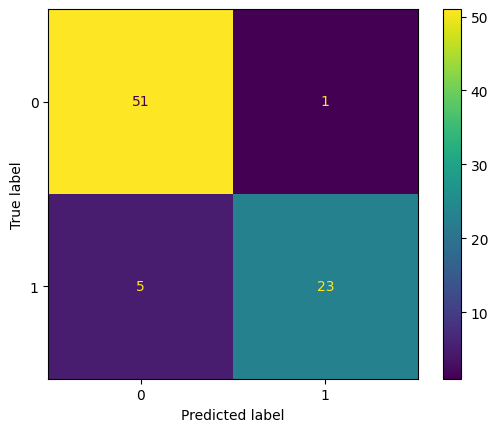

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
print(df.info())
print(df.head())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df.drop("Purchased",axis=1)
y= df["Purchased"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model=GaussianNB() 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nAccuracy : ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix : ", confusion_matrix(y_test, y_pred))
print("\nClassification Report : ", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.show()